In [78]:
# merging sql data with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3


os.getcwd()

df = pd.read_csv('/home/jupyter-jbatist48/JDL-SUM_23_PIZZA_PROJ/SQL_files/updated_sql.csv')
rain = pd.read_csv('/home/jupyter-jbatist48/JDL-SUM_23_PIZZA_PROJ/SQL_files/RAIN_FALL_2015_-_Sheet1.csv')
snow= pd.read_csv('/home/jupyter-jbatist48/JDL-SUM_23_PIZZA_PROJ/SQL_files/snowfall.csv')


In [2]:
# Month, Total Revenue, & Hour columns
df['month'] = df['date'].str[5:7]
df['month'] = df['month'].astype('int')
df['total_revenue'] = df['quantity'] * df['price']
df['time']= pd.to_datetime(df['time'])
df['hour']= pd.to_datetime(df['time']).dt.hour
df.head(5)

,quantity,date,time,size,pizza_type_id,price,category,ingredients,month,total_revenue,hour
0,1,2015-01-03,2023-06-29 14:22:10,M,hawaiian,13.25,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25,14
1,1,2015-01-03,2023-06-29 14:32:51,XL,the_greek,25.50,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",1,25.50,14
2,1,2015-01-03,2023-06-29 14:40:42,S,mediterraneo,12.00,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",1,12.00,14
3,1,2015-01-03,2023-06-29 14:48:45,M,spinach_fet,16.00,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",1,16.00,14
4,1,2015-01-03,2023-06-29 14:49:58,M,pepperoni,12.50,Classic,"Mozzarella Cheese, Pepperoni",1,12.50,14


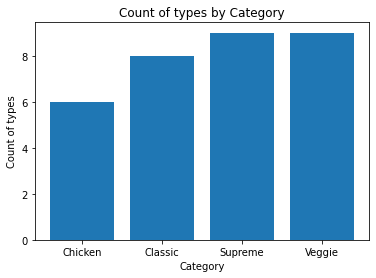

In [8]:
# Amount of pizza types per cat

category_count = df.groupby('category')['pizza_type_id'].nunique()
plt.bar(category_count.index, category_count.values)

plt.xlabel('Category')
plt.ylabel('Count of types')
plt.title('Count of types by Category')
plt.show()

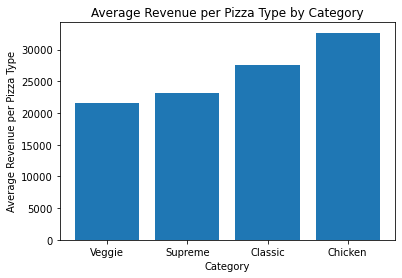

In [10]:
avg_revenue_per_type = category_revenue / category_count

sorted_categories = avg_revenue_per_type.sort_values().index

plt.bar(sorted_categories, avg_revenue_per_type[sorted_categories])

plt.xlabel('Category')
plt.ylabel('Average Revenue per Pizza Type')
plt.title('Average Revenue per Pizza Type by Category')

plt.show()

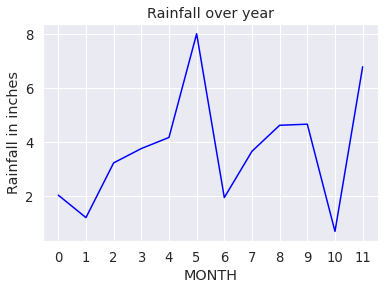

In [36]:
#Rain Graph
rainfall = rain.groupby('month').sum()
months = range(1,13)
plt.plot(months, rainfall['rainfall'], color='blue')
plt.title('Rainfall over year')
plt.xticks(months)
plt.ylabel('Rainfall in inches')
plt.xlabel('MONTH')
plt.show()




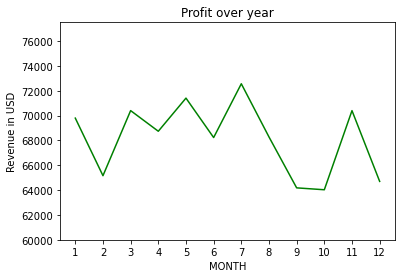

In [7]:
#Profit graph
results = df.groupby('month').sum()
months = range(1,13)
plt.plot(months, results['total_revenue'], color = 'green')
plt.title('Profit over year')
plt.ylim([60000, 77500])
plt.xticks(months)
plt.ylabel('Revenue in USD')
plt.xlabel('MONTH')
plt.show()




<Figure size 864x576 with 0 Axes>

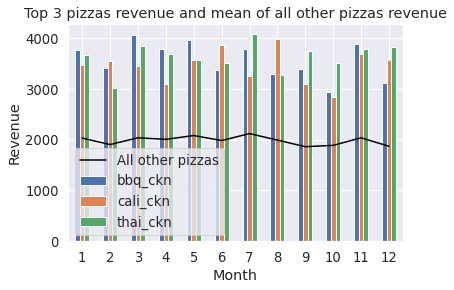

In [63]:
plt.figure(figsize=(12, 8))

other_pizzas = df[~df['pizza_type_id'].isin(top3_pizzas)]
mean_revenue = other_pizzas.groupby('month')['total_revenue'].sum() / 29
mean_revenue.index = mean_revenue.index - 1

#Bars
cumulative_revenue.plot(kind='bar', stacked=False)

#line for mean
mean_revenue.plot(color='black', label='All other pizzas')


plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Top 3 pizzas revenue and mean of all other pizzas revenue')
plt.legend(loc='lower left')

fig = plt.gcf()
fig.patch.set_facecolor('none')
plt.savefig('graph.png', transparent=True)
plt.show()

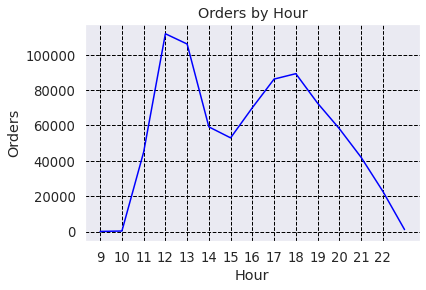

In [67]:
sumhours = df.groupby('hour')['total_revenue'].sum()
hours = range(9, 23)


fig = plt.figure(facecolor='none')
plt.plot(sumhours, color='blue')


plt.title('Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.xticks(hours)


plt.grid(color='black', linestyle='--')
fig.patch.set_alpha(0)
plt.show()







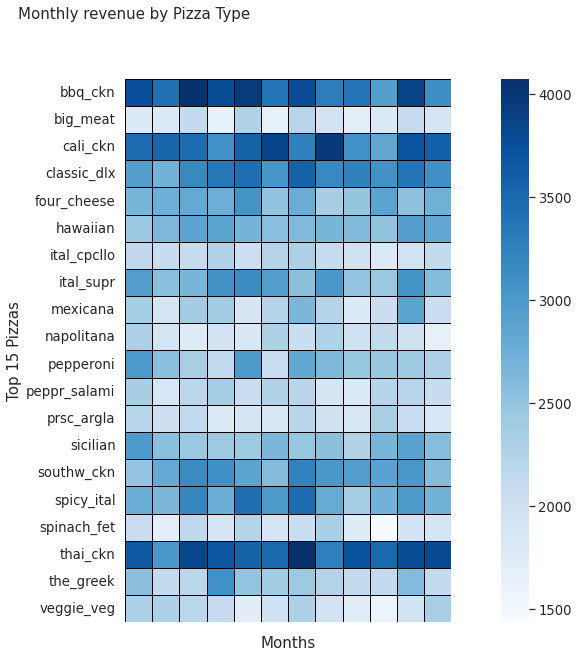

In [62]:
# Month abbreviations
month_abbreviations = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}


sns.set(font_scale=1.2)


result.columns = [month_abbreviations.get(month, '') for month in result.columns]


plt.figure(figsize=(18, 10))
ax = sns.heatmap(result, square=True, fmt="g", cmap='Blues', linewidths=1, linecolor='black')


plt.suptitle('Monthly revenue by Pizza Type', fontsize=15)
ax.set_ylabel('Top 15 Pizzas', size=15)
ax.set_xlabel('Months', size=15)


fig = plt.gcf()
fig.patch.set_facecolor('none')
plt.savefig('heatmap.png', transparent=True)
plt.show()


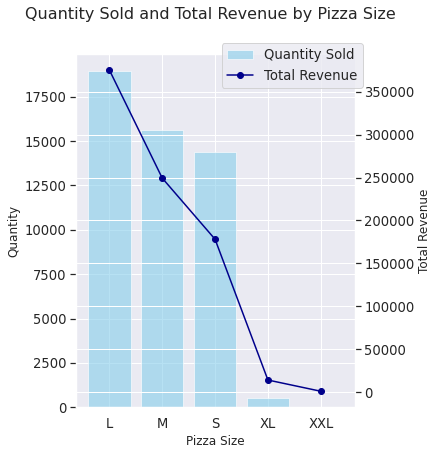

In [61]:
quantity_by_size = df.groupby('size')['quantity'].sum()
revenue_by_size = df.groupby('size')['total_revenue'].sum()

fig, ax1 = plt.subplots(figsize=(5, 6.5))

#Bars
ax1.bar(quantity_by_size.index, quantity_by_size, color='skyblue', alpha=0.6, label='Quantity Sold')
ax1.set_ylabel('Quantity Sold', fontsize=12)
ax1.set_xlabel('Pizza Size', fontsize=12)

#line
ax2 = ax1.twinx()
ax2.plot(revenue_by_size.index, revenue_by_size, color='darkblue', marker='o', label='Total Revenue')
ax1.set_ylabel('Quantity', fontsize=12)
ax2.set_ylabel('Total Revenue', fontsize=12)


fig.patch.set_facecolor('none')
fig.suptitle('Quantity Sold and Total Revenue by Pizza Size', fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.5, 1.05), bbox_transform=ax1.transAxes)
plt.savefig('graph.png', transparent=True)